# Case Study on Probability for Data Science

### Objective:

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

### Importing relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

## Loading the dataset into python environment:

In [21]:
df = pd.read_csv('Data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [23]:
df.shape

(8124, 23)

### Insight:

The dataset contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Exploratory Data Analysis

### Here we are visualizing the commonly identifiable physical features of the mushrooms:

### 1. Visualization of the count of edible and poisonous mushrooms using Seaborn:

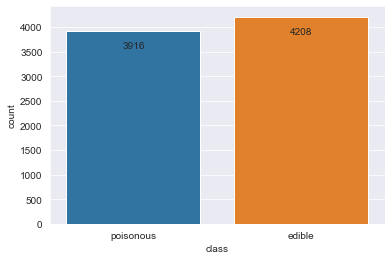

In [37]:
sns.set_style('darkgrid')
ax = sns.countplot(x = df['class'])
plt.xticks(ticks = [0, 1], labels = ['poisonous', 'edible'])
rects = ax.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    ax.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')
plt.show()

### Insight:

 * From the plot it is clear that the number of edible mushrooms are more in number. 

### 2. Visualization of the Cap color of edible and poisonous mushrooms using Seaborn:

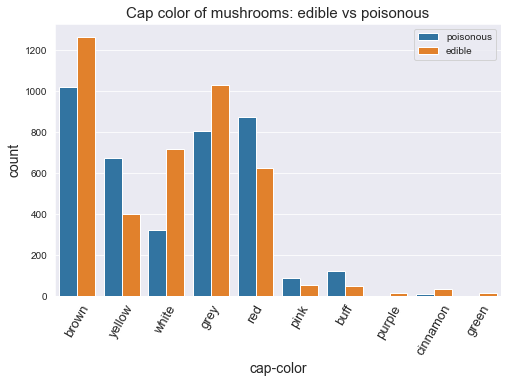

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'cap-color', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           labels = ['brown', 'yellow', 'white', 'grey', 'red', 'pink', 'buff', 'purple', 'cinnamon', 'green'], fontsize = 13, rotation = 60)
plt.xlabel('cap-color', fontsize=14)
plt.ylabel('count', fontsize = 14)
plt.title('Cap color of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

### 3. Visualization of the Odor of edible and poisonous mushrooms using Seaborn:

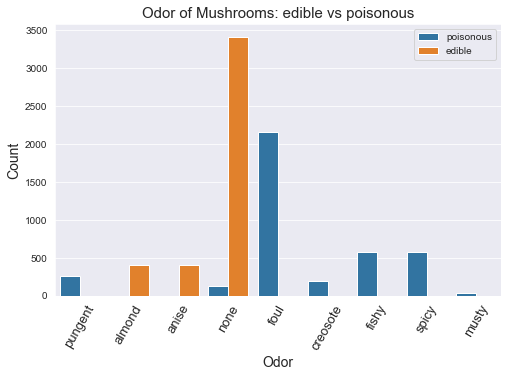

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'odor', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8], 
           labels = ['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'], fontsize = 13, rotation = 60)
plt.xlabel('Odor', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Odor of Mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

### Insight:

* The mushrooms with odor almond and anise are seemingly edible from the plot and good to consume.

## 4. Visualization of the population properties of edible and poisonous mushrooms using Seaborn:

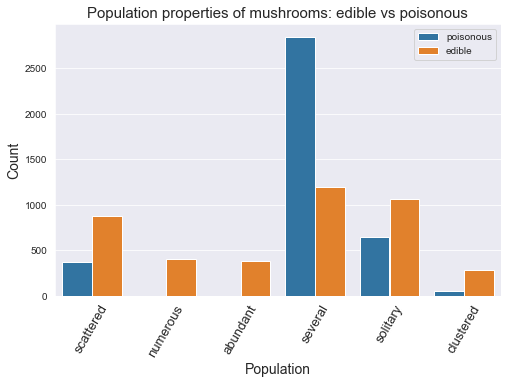

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'population', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], 
           labels = ['scattered', 'numerous', 'abundant', 'several', 'solitary', 'clustered'], fontsize = 13, rotation = 60)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Population properties of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

## 5. Visualization of the habitats of edible and poisonous mushrooms using Seaborn:

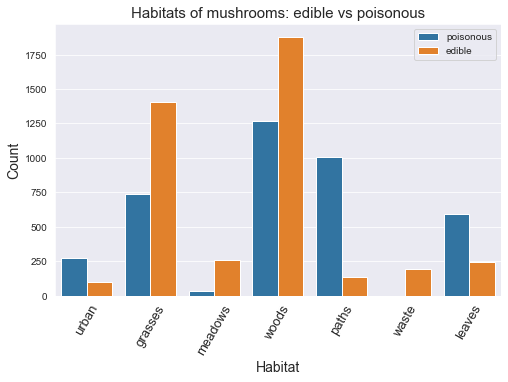

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'habitat', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], 
           labels = ['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'], fontsize = 13, rotation = 60)
plt.xlabel('Habitat', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Habitats of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

## Preprocessing: 

### * Chi Square Test: 

 Chi-squared test is used here to determine the dependencies of the features inorder to build the model.

In [64]:
independent_features = []
p_values = []

In [65]:
def independency_test(df1, df2):
    contingency_table = pd.crosstab(df1, df2)
    observed_values = contingency_table.values
    x2, x2_p_value, deg_of_frdm, exp_val = stats.chi2_contingency(observed=observed_values)
    return x2_p_value

In [66]:
for col in df.columns[1:]:
    p_val = independency_test(df['class'], df[col])
    p_values.append(p_val)
    if p_val > 0.05:
        independent_features.append(col)

In [67]:
print("The column excluding target are: \n", df.columns[1:])

The column excluding target are: 
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [68]:
print('Corresponding p values are:\n', p_values)

Corresponding p values are:
 [1.1964565685935438e-103, 5.518427038649143e-68, 6.055814598336576e-78, 0.0, 0.0, 5.501707411861009e-31, 5.0229776137324786e-216, 0.0, 0.0, 4.604746212155192e-20, 7.702047904943513e-290, 0.0, 0.0, 0.0, 0.0, 1.0, 3.32097274916963e-41, 4.23575764172306e-82, 0.0, 0.0, 0.0, 0.0]


In [69]:
print('Independent features are: ', independent_features)

Independent features are:  ['veil-type']


Since the feature 'veil-type' showed no dependency, we are removing the feature.

In [70]:
df.drop(columns=['veil-type'], axis= 1, inplace = True)

In [71]:
df.shape

(8124, 22)

In [73]:
X = df.drop(columns=['class'], axis = 1)
y = df['class']

## Encoding:

In [75]:
X = pd.get_dummies(X)

In [78]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [79]:
print("We encoded poisonous as 1 and edible as 0!")

We encoded poisonous as 1 and edible as 0!


## Finding out which classification model gives the best result:

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [84]:
lr = LogisticRegression()
model_1 = lr.fit(X_train, y_train)
lr_predict = model_1.predict(X_test)

In [85]:
confusion_matrix(y_test, lr_predict)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [86]:
accuracy_score(y_test, lr_predict)

1.0

### Insight:

Performing Logistic Regression, the accuracy score is 100%. 

## Decision Tree Classifier:

In [88]:
dt = DecisionTreeClassifier()
model_2 = dt.fit(X_train, y_train)
dt_predict = model_2.predict(X_test)

In [89]:
confusion_matrix(y_test, dt_predict)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [90]:
accuracy_score(y_test, dt_predict)

1.0

### Insight:

Performing Decision Tree Classifier, the accuracy score is 100%. 

## Naive Bayes Classifiers:

## 1. Gaussian Naive Bayes

In [92]:
gnb = GaussianNB()
model_3 = gnb.fit(X_train, y_train)
gnb_predict = model_3.predict(X_test)

In [93]:
confusion_matrix(y_test, gnb_predict)

array([[778,  65],
       [  0, 782]], dtype=int64)

In [94]:
accuracy_score(y_test, gnb_predict)

0.96

### Insight:

Performing Gaussian Naive Bayes, the accuracy score is 96%. 

## 2. Bernoulli Naive Bayes

In [95]:
bnb = BernoulliNB()
model_4 = bnb.fit(X_train, y_train)
bnb_predict = model_4.predict(X_test)

In [96]:
confusion_matrix(y_test, bnb_predict)

array([[827,  16],
       [ 88, 694]], dtype=int64)

In [97]:
accuracy_score(y_test, bnb_predict)

0.936

### Insight:

Performing Bernoulli Naive Bayes, the accuracy score is 93.6%. 

## 3. Multinomial Naive Bayes

In [98]:
mnb = MultinomialNB()
model_5 = mnb.fit(X_train, y_train)
mnb_predict = model_5.predict(X_test)

In [99]:
confusion_matrix(y_test, mnb_predict)

array([[837,   6],
       [ 74, 708]], dtype=int64)

In [100]:
accuracy_score(y_test, mnb_predict)

0.9507692307692308

### Insight:

Performing Multinomial Naive Bayes, the accuracy score is 95.07%.

## Conclusion:

* Couple of the classification methods hit 100% accuracy with this dataset.
* Gaussian Naive Bayes has given the best prediction among the naive bayes classifiers.